<a href="https://colab.research.google.com/github/asimoya99/Computer-Vision/blob/master/Training_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
#display figures in the notebook

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits



Text(0.5, 1.0, 'image label: 3')

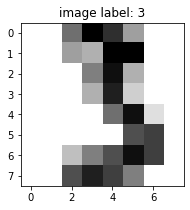

In [0]:
digits = load_digits()
sample_index = 45
plt.figure(figsize = (3,3))
plt.imshow(digits.images[sample_index],cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.title("image label: %d"%digits.target[sample_index])


In [0]:
# train/ test split the datasets
from sklearn.model_selection import train_test_split
data = np.asarray(digits.data, dtype = 'float32')
target = np.asarray(digits.target,dtype= 'int32')
X_train,X_test, y_train, y_test = train_test_split(data,target,test_size=0.15, random_state = 37)


In [0]:
# preprocessing the input data
from sklearn import preprocessing

# mean = 0; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#print(scaler.mean_)
#print(scaler.scale_)

Text(0.5, 1.0, 'transformed sample\n(standardization)')

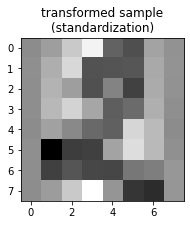

In [0]:
# display one of the transformed sample numbers
sample_index = 45
plt.figure(figsize=(3,3))
plt.imshow(X_train[sample_index].reshape(8,8), cmap= plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)")



Text(0.5, 1.0, 'original sample')

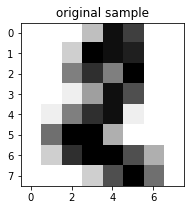

In [0]:
plt.figure(figsize=(3,3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8,8), cmap= plt.cm.gray_r, interpolation='nearest')
plt.title("original sample")



In [0]:
print(X_train.shape, y_train.shape)

(1527, 64) (1527,)


In [0]:
print(X_test.shape, y_test.shape)

(270, 64) (270,)


In [0]:
# preprocessing the target data
y_train[:3]


array([2, 9, 5], dtype=int32)

In [0]:
#using keras to convert inter_encoded categorical variables into one hot encoded values
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_train[:3]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [0]:
#first keras model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers


In [0]:
input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = 10
model = Sequential()
model.add(Dense(hidden_dim, input_dim = input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))
model.compile(optimizer = optimizers.SGD(lr = 0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train,Y_train,validation_split = 0.2,epochs = 15, batch_size = 32)


In [0]:
history.history

In [0]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [0]:
# for easier plotting wrap this into a dataframe
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
history_df

,loss,acc,val_loss,val_acc,epoch
0,0.987687,0.746929,0.442094,0.898693,0
1,0.329848,0.941851,0.281365,0.934641,1
2,0.225500,0.959869,0.218481,0.944444,2
3,0.174403,0.968059,0.192230,0.947712,3
4,0.143698,0.977068,0.172205,0.947712,4
5,0.123584,0.980344,0.157372,0.957516,5
6,0.107461,0.980344,0.142528,0.970588,6
7,0.096084,0.981982,0.134850,0.973856,7
8,0.086526,0.982801,0.131934,0.973856,8
9,0.078597,0.986896,0.123229,0.973856,9


In [0]:

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["acc", "val_acc"], ax=ax1);

In [0]:
# monitor convergence with tensor board
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
!rm -rf tensorboard_logs


In [0]:

import datetime 
from tensorflow.keras.callbacks import TensorBoard
model = Sequential()
model.add(Dense(hidden_dim, input_dim= input_dim, activation= "tanh"))
model.add(Dense(output_dim, activation="softmax"))
model.compile(optimizer=optimizers.SGD(lr = 0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "tensorboard_logs/" + timestamp
tensorboard_callback = TensorBoard(log_dir = log_dir, histogram_freq =1)
model.fit(x=X_train, y= Y_train, validation_split= 0.2, epochs=15, callbacks=[tensorboard_callback])

Train on 1221 samples, validate on 306 samples
Epoch 1/15
1221/1221 [==============================] - 0s 386us/sample - loss: 0.9334 - acc: 0.7600 - val_loss: 0.4408 - val_acc: 0.9020
Epoch 2/15
1221/1221 [==============================] - 0s 95us/sample - loss: 0.3337 - acc: 0.9247 - val_loss: 0.2864 - val_acc: 0.9477
Epoch 3/15
1221/1221 [==============================] - 0s 92us/sample - loss: 0.2252 - acc: 0.9541 - val_loss: 0.2216 - val_acc: 0.9542
Epoch 4/15
1221/1221 [==============================] - 0s 108us/sample - loss: 0.1792 - acc: 0.9631 - val_loss: 0.1974 - val_acc: 0.9575
Epoch 5/15
1221/1221 [==============================] - 0s 95us/sample - loss: 0.1474 - acc: 0.9689 - val_loss: 0.1717 - val_acc: 0.9641
Epoch 6/15
1221/1221 [==============================] - 0s 93us/sample - loss: 0.1271 - acc: 0.9771 - val_loss: 0.1589 - val_acc: 0.9641
Epoch 7/15
1221/1221 [==============================] - 0s 92us/sample - loss: 0.1113 - acc: 0.9828 - val_loss: 0.1525 - val_acc:

In [0]:
%tensorboard --logdir tensorboard_logs


In [0]:
optimizers.Adam?